In [5]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#regression librarry
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures

#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [6]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 3 rows and 2 Columns


In [7]:
# seperate fetures and label
x_cv = CV_dataset.iloc[:,:-1].values
y_cv = CV_dataset.iloc[:,1].values

In [9]:
# # fitting simple linear regression model to the training dataset
lin_reg = LinearRegression(normalize=True)  
lin_reg.fit( x_cv, y_cv)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_cv)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_cv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


 Accuracy train by acc_r2 100.0

 Accuracy train by median_ab_error 4.3655745685100555e-11


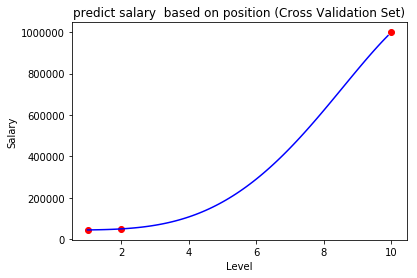

In [10]:
class Cross_validation():
           
    def y_prediction(self,x_train,lin_reg2,poly_reg):
        
        # predicting the train set result
        
        y_pred_train = lin_reg2.predict(poly_reg.fit_transform(x_train))
        return y_pred_train
        

    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        acc_r2 = r2_score(y_train, y_predict_train)*100

        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_cv,y_cv,poly_reg, lin_reg2):
        
        # visualizing the testing set result
        
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_cv,y_cv,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Cross Validation Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
 
    
    file1 = open('Polynomial_RegModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(x_cv,lin_reg2,poly_reg)
    
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv,y_cv,poly_reg, lin_reg2)

if __name__ == '__main__':
    main()
